In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [81]:
train_d=pd.read_csv("SalaryData_Train.csv")
train_d.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
train_d[train_d.duplicated()].shape

(3258, 14)

In [83]:
train_d.drop_duplicates().reset_index(drop=True)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26899,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
26900,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
26901,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [84]:
test_d=pd.read_csv('SalaryData_Test.csv')
test_d.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [85]:
test_d[test_d.duplicated()].shape

(930, 14)

In [86]:
test_d.drop_duplicates().reset_index(drop=True)
test_d.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<AxesSubplot:>

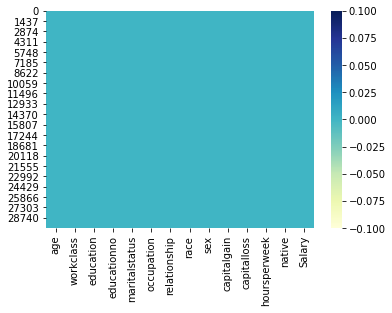

In [96]:
# visualzations fro train data using heat map
import seaborn as sns
sns.heatmap(train_d.isna(),cmap="YlGnBu",fmt="d")

<AxesSubplot:>

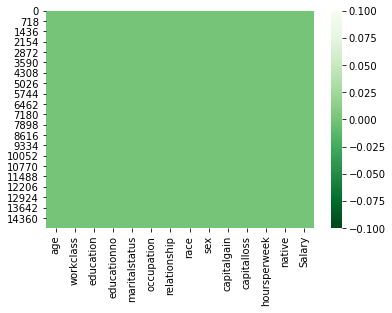

In [100]:
sns.heatmap(test_d.isna(),cmap="Greens_r",fmt="d")

<Figure size 720x576 with 0 Axes>

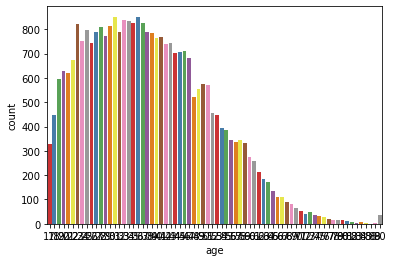

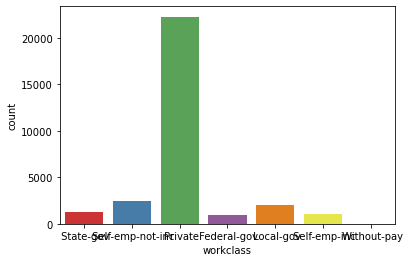

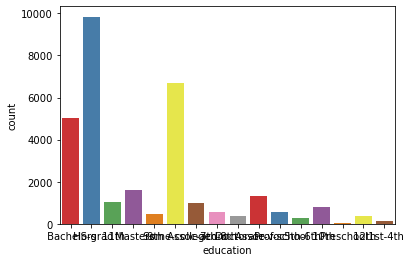

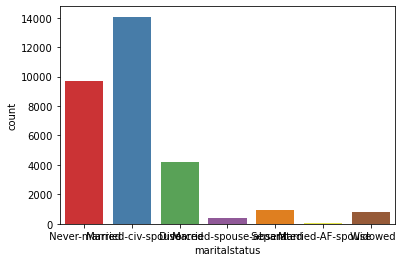

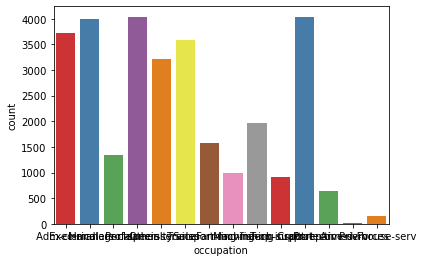

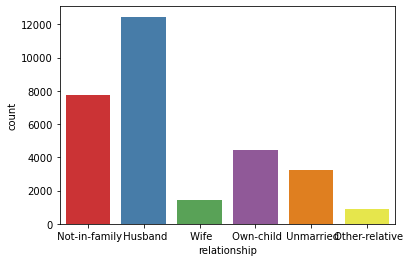

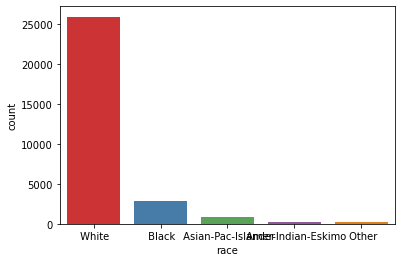

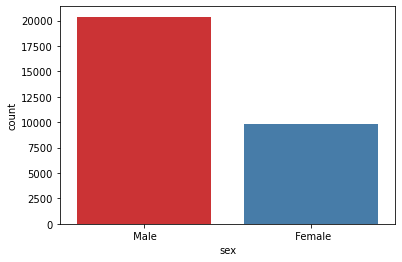

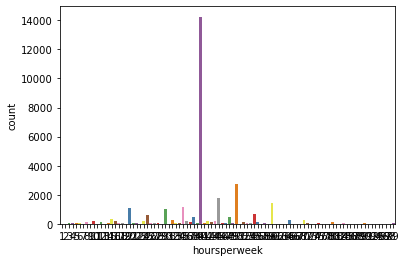

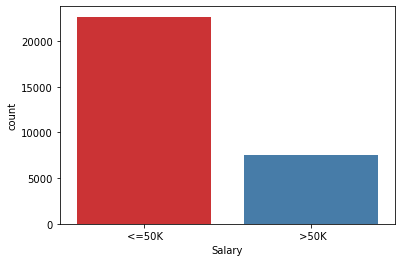

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
cols=["age","workclass","education","maritalstatus","occupation","relationship","race","sex","hoursperweek","Salary"]
for i in cols:
    plt.figure()
    sns.countplot(x=i,data=train_d,palette="Set1")

<AxesSubplot:>

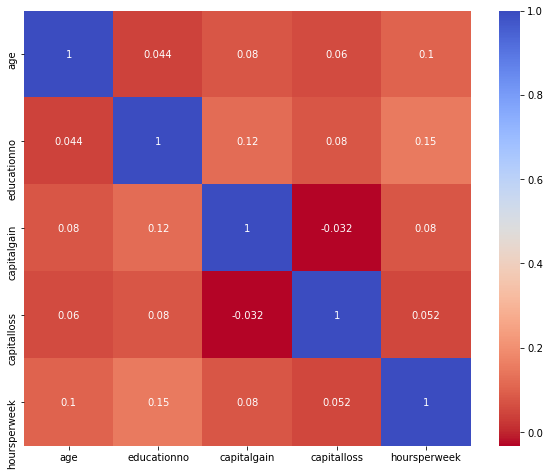

In [113]:
# lets find the correaltion of the train data
plt.figure(figsize=(10,8))
sns.heatmap(train_d.corr(),annot=True,cmap="coolwarm_r")

<AxesSubplot:>

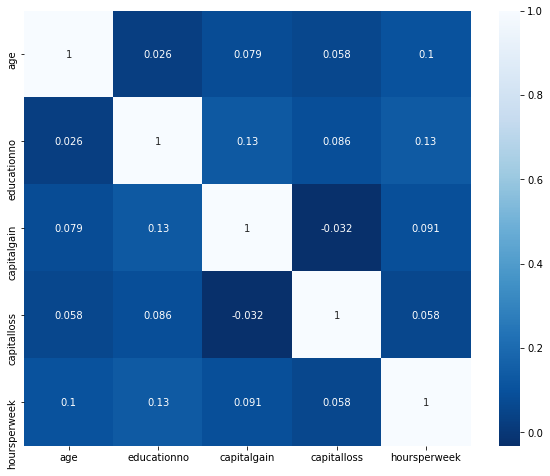

In [114]:
# lets find the correaltion of the test_data
plt.figure(figsize=(10,8))
sns.heatmap(test_d.corr(),annot=True,cmap="Blues_r")

In [117]:
# concat the two csv files
data_df=pd.concat([train_d,test_d],axis=0).reset_index(drop=True)
data_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [119]:
data_df1=data_df.drop(columns=['educationno','relationship','race'],axis=1).reset_index(drop=True)

In [120]:
data_df1.head()

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,Cuba,<=50K


In [122]:
# lest use label encoder for the categorucal data
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
data_df1['workclass']=lm.fit_transform(data_df1['workclass'])
data_df1['education']=lm.fit_transform(data_df1['education'])
data_df1['maritalstatus']=lm.fit_transform(data_df1['maritalstatus'])
data_df1['occupation']=lm.fit_transform(data_df1['occupation'])
data_df1['sex']=lm.fit_transform(data_df1['sex'])
data_df1['native']=lm.fit_transform(data_df1['native'])

In [125]:
data_df1

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,2174,0,40,37,<=50K
1,50,4,9,2,3,1,0,0,13,37,<=50K
2,38,2,11,0,5,1,0,0,40,37,<=50K
3,53,2,1,2,5,1,0,0,40,37,<=50K
4,28,2,9,2,9,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
45216,33,2,9,4,9,1,0,0,40,37,<=50K
45217,39,2,9,0,9,0,0,0,36,37,<=50K
45218,38,2,9,2,9,1,0,0,50,37,<=50K
45219,44,2,9,0,0,1,5455,0,40,37,<=50K


In [124]:
X=data_df1.iloc[:,0:9]
Y=data_df1.iloc[:,-1]

In [126]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.33,random_state=100)

In [162]:
# lets check for the gaussian NB
igaunb=GaussianNB()
model1=igaunb.fit(X,Y)
y_pred=igaunb.predict(xtest) # predicting the yvalue for the testing data values

In [163]:
y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [164]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(ytest,y_pred)


In [165]:
print("accuracy_score of the testing data",accuracy_score)

accuracy_score of the testing data 0.7929370769952423


In [166]:
# lets find the accuaraccuracy_score for the traing data
y_train_pred=igaunb.predict(xtrain)
y_train_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [167]:
from sklearn.metrics import accuracy_score
accuracy_score_train=accuracy_score(ytrain,y_train_pred)

In [168]:
print("accuracy_score of the testing data",accuracy_score_train)

accuracy_score of the testing data 0.789590071951944


In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(ytest,y_pred)   # for the testing datapri
confusion_matrix

array([[10684,   553],
       [ 2537,  1149]], dtype=int64)

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

       <=50K       0.95      0.81      0.87     13221
        >50K       0.31      0.68      0.43      1702

    accuracy                           0.79     14923
   macro avg       0.63      0.74      0.65     14923
weighted avg       0.88      0.79      0.82     14923



MULTINOMIAL NAVYE BYES

In [171]:
imulnb=MultinomialNB()
model2=imulnb.fit(X,Y)

In [173]:
y_mulnb_pred=imulnb.predict(xtest)

In [174]:
y_mulnb_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(ytest,y_mulnb_pred)  # test data
print("accuracy_score",accuracy_score)

accuracy_score 0.7731689338604838


In [177]:
# train data
y_mulnb_pred_train=imulnb.predict(xtrain)

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(ytrain,y_mulnb_pred_train)  # test data
print("accuracy_score",accuracy_score)

accuracy_score 0.7738134530332035


In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(ytest,y_mulnb_pred)   # for the testing datapri
confusion_matrix

array([[10751,   486],
       [ 2899,   787]], dtype=int64)

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_mulnb_pred,ytest))

              precision    recall  f1-score   support

       <=50K       0.96      0.79      0.86     13650
        >50K       0.21      0.62      0.32      1273

    accuracy                           0.77     14923
   macro avg       0.59      0.70      0.59     14923
weighted avg       0.89      0.77      0.82     14923

